In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Ground Truth :9')

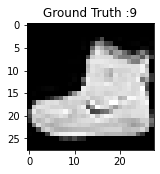

In [4]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(x_train[0], cmap='gray')
plt.title("Ground Truth :{}".format(y_train[0]))

In [5]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

In [7]:
train_y_one_hot = to_categorical(y_train)
test_y_one_hot = to_categorical(y_test)

In [8]:
len(test_y_one_hot)

10000

In [9]:
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(x_train, train_y_one_hot, test_size=0.2, random_state=13)

In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [16]:
fashion_model.fit(train_X, train_label, batch_size=60,epochs=20,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 232us/step - loss: 0.4610 - accuracy: 0.8313 - val_loss: 0.3272 - val_accuracy: 0.8853
Epoch 2/20
48000/48000 [==============================] - 9s 179us/step - loss: 0.2854 - accuracy: 0.8965 - val_loss: 0.2736 - val_accuracy: 0.9010
Epoch 3/20
48000/48000 [==============================] - 8s 176us/step - loss: 0.2356 - accuracy: 0.9140 - val_loss: 0.2677 - val_accuracy: 0.9025
Epoch 4/20
48000/48000 [==============================] - 8s 176us/step - loss: 0.2051 - accuracy: 0.9249 - val_loss: 0.2772 - val_accuracy: 0.9057
Epoch 5/20
48000/48000 [==============================] - 8s 176us/step - loss: 0.1782 - accuracy: 0.9338 - val_loss: 0.2609 - val_accuracy: 0.9020
Epoch 6/20
48000/48000 [==============================] - 8s 177us/step - loss: 0.1563 - accuracy: 0.9418 - val_loss: 0.2319 - val_accuracy: 0.9196
Epoch 7/20
48000/48000 [==============================] - 9s 

In [17]:
fashion_model.save("fashion_model_dropout.h5py")

In [18]:
test_eval = fashion_model.evaluate(x_test, test_y_one_hot, verbose=1)

10000/10000 [==============================] - 1s 129us/step


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5089083019563928
Test accuracy: 0.9154999852180481


In [20]:
predicted_classes = fashion_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((10000,), (10000,))

Found correct labels:  9151


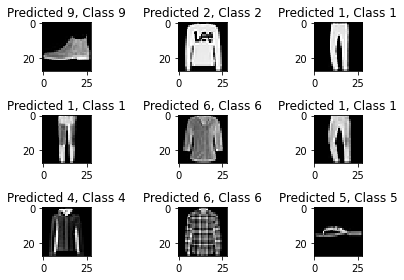

In [21]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found correct labels: ",len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()